### 1. Import Packages and load the Data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [106]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
sample_submission_df = pd.read_csv("sample_submission.csv")

### 2. Data Prepration

In [107]:
print ('Columns: ')
print (train_df.columns.values)
print ('-'*70)
print ('shape: ', train_df.shape)

Columns: 
['id' 'N_Days' 'Drug' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders'
 'Edema' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage' 'Status']
----------------------------------------------------------------------
shape:  (15000, 20)


In [108]:
print (train_df.info())
print ('*'*20)
print (test_df.info())
print ('*'*20)
print(sample_submission_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8492 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8494 non-null   object 
 6   Hepatomegaly   8487 non-null   object 
 7   Spiders        8485 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6612 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8364 non-null   float64
 13  Alk_Phos       8485 non-null   float64
 14  SGOT           8480 non-null   float64
 15  Tryglicerides  6560 non-null   float64
 16  Platelets      14429 non-null  float64
 17  Prothrombin    14979 non-null  float64
 18  Stage 

In [109]:
#Categorical Features
# This will show the count, number of unique values, top values and most frquency of categorical columns.
train_df.describe(include=['O'])

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
count,8492,15000,8494,8487,8485,15000,15000
unique,2,2,3,3,2,3,3
top,D-penicillamine,F,N,N,N,N,C
freq,4493,14380,8088,4533,6706,13838,10103


In [110]:
print(test_df.head())

      id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0  15000   708.0              NaN  18628.0   F     NaN          NaN     NaN   
1  15001   971.0          Placebo  19470.0   F       N            N       Y   
2  15002  1427.0  D-penicillamine  11872.0   F       N            N       N   
3  15003  1097.0              NaN  18993.0   F     NaN          NaN     NaN   
4  15004  2103.0              NaN  22797.0   F     NaN          NaN     NaN   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        3.2          NaN     3.15     NaN       NaN     NaN   
1     N       20.0       1276.0     3.04   141.0    2496.0  203.05   
2     N        0.5        257.0     3.74    37.0    9009.8  127.00   
3     N        1.8          NaN     3.20     NaN       NaN     NaN   
4     S        0.9          NaN     3.75     NaN       NaN     NaN   

   Tryglicerides  Platelets  Prothrombin  Stage  
0            NaN      388.0          9.9    3.0  
1   

In [111]:
# Display statistical description for numeric columns.
print(train_df.describe())
print("___"*20)
print(test_df.describe())

                 id        N_Days           Age     Bilirubin  Cholesterol  \
count  15000.000000  15000.000000  15000.000000  15000.000000  6612.000000   
mean    7499.500000   1970.903067  19271.966733      1.881873   324.806745   
std     4330.271354   1272.532950   3732.634877      2.790137   172.087714   
min        0.000000     10.000000    244.000000      0.300000    17.200000   
25%     3749.750000   1092.000000  16467.000000      0.600000   239.000000   
50%     7499.500000   1790.000000  19544.000000      0.900000   280.000000   
75%    11249.250000   2644.000000  22336.000000      1.800000   358.000000   
max    14999.000000  25569.000000  94306.000000     28.000000  2880.000000   

            Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  15000.000000  8364.000000   8485.000000  8480.000000    6560.000000   
mean       3.517281    75.857006   1629.738417   106.603055     111.827439   
std        0.372396    74.839986   1836.475288    51.787553    

In [112]:
# Check for missing values
print(train_df.isnull().sum())
print("___"*20)
print(test_df.isnull().sum())

id                  0
N_Days              0
Drug             6508
Age                 0
Sex                 0
Ascites          6506
Hepatomegaly     6513
Spiders          6515
Edema               0
Bilirubin           0
Cholesterol      8388
Albumin             0
Copper           6636
Alk_Phos         6515
SGOT             6520
Tryglicerides    8440
Platelets         571
Prothrombin        21
Stage               0
Status              0
dtype: int64
____________________________________________________________
id                  0
N_Days              0
Drug             4369
Age                 0
Sex                 0
Ascites          4363
Hepatomegaly     4374
Spiders          4375
Edema               0
Bilirubin           0
Cholesterol      5605
Albumin             0
Copper           4446
Alk_Phos         4372
SGOT             4374
Tryglicerides    5640
Platelets         362
Prothrombin        15
Stage               0
dtype: int64


#### Columns which contains missing values


1_ Drug


2_ Ascites


3_ Hepatomegaly



4_ Spiders


5_ Cholesterol


6_ Copper


7_ Alk_Phos


8_ SGOT


9_ Tryglicerides


10_ Platelets


11_ Prothrombin

In [113]:
# Print the test data to know it.
train_df.head().style.set_properties(**{"background-color": "pink","color":"black","border": "1.5px solid Yellow"})

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1690.000000,Placebo,16714.000000,F,N,Y,Y,N,14.400000,514.000000,3.160000,42.000000,2184.000000,185.000000,126.000000,319.000000,13.200000,4.000000,D
1,1,2216.000000,D-penicillamine,19327.000000,F,Y,Y,N,N,1.300000,nan,3.030000,234.000000,601.000000,135.000000,nan,559.000000,11.500000,4.000000,D
2,2,1725.000000,Placebo,12897.000000,F,N,N,N,N,0.800000,232.000000,3.850000,9.000000,1074.000000,128.650000,99.000000,295.000000,9.500000,3.000000,C
3,3,2468.000000,D-penicillamine,20555.000000,F,N,N,Y,N,0.500000,176.000000,3.610000,121.000000,558.000000,96.100000,55.000000,151.000000,11.000000,3.000000,C
4,4,999.000000,D-penicillamine,26580.000000,M,N,N,N,N,1.800000,318.000000,3.520000,73.000000,721.000000,85.250000,260.000000,nan,9.600000,2.000000,C


In [114]:
# print the train data to know it.
test_df.head().style.set_properties(**{"background-color": "brown","color":"black","border": "1.5px solid Pink"})

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,708.000000,nan,18628.000000,F,nan,nan,nan,N,3.200000,nan,3.150000,nan,nan,nan,nan,388.000000,9.900000,3.000000
1,15001,971.000000,Placebo,19470.000000,F,N,N,Y,N,20.000000,1276.000000,3.040000,141.000000,2496.000000,203.050000,157.000000,319.000000,12.900000,4.000000
2,15002,1427.000000,D-penicillamine,11872.000000,F,N,N,N,N,0.500000,257.000000,3.740000,37.000000,9009.800000,127.000000,73.000000,283.000000,10.400000,2.000000
3,15003,1097.000000,nan,18993.000000,F,nan,nan,nan,N,1.800000,nan,3.200000,nan,nan,nan,nan,117.000000,10.700000,2.000000
4,15004,2103.000000,nan,22797.000000,F,nan,nan,nan,S,0.900000,nan,3.750000,nan,nan,nan,nan,226.000000,9.900000,2.000000


In [115]:
# Print the sample submission data to know it.
sample_submission_df.head().style.set_properties(**{"background-color": "pink","color":"black","border": "1.5px solid Yellow"})

,id,Status_C,Status_CL,Status_D
0,15000,0.628084,0.034788,0.337128
1,15001,0.628084,0.034788,0.337128
2,15002,0.628084,0.034788,0.337128
3,15003,0.628084,0.034788,0.337128
4,15004,0.628084,0.034788,0.337128


## Data Prepration:
####       1. Handle Missing Vlues
####        2. encode categories
####        3. normalize the data

In [116]:
# This function is going to check the data types for columns, unique values and missing values.

def check(df):
    check_list=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        check_list.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(check_list)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
print(check(train_df))
print("____"*20)
print(check(test_df))

           column   dtypes  nunique  sum_null
0              id    int64    15000         0
1          N_Days  float64      548         0
2            Drug   object        2      6508
3             Age  float64      394         0
4             Sex   object        2         0
5         Ascites   object        3      6506
6    Hepatomegaly   object        3      6513
7         Spiders   object        2      6515
8           Edema   object        3         0
9       Bilirubin  float64      116         0
10    Cholesterol  float64      217      8388
11        Albumin  float64      163         0
12         Copper  float64      174      6636
13       Alk_Phos  float64      392      6515
14           SGOT  float64      202      6520
15  Tryglicerides  float64      149      8440
16      Platelets  float64      260       571
17    Prothrombin  float64       53        21
18          Stage  float64        4         0
19         Status   object        3         0
__________________________________

In [117]:
# Drop duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [118]:
# Check the shape of data.
print(f"The shape of train data: {train_df.shape}")
print("___"*20)
print(f"The shape of test data: {test_df.shape}")

The shape of train data: (15000, 20)
____________________________________________________________
The shape of test data: (10000, 19)


## Handle missing Values

In [119]:
print(train_df.isnull().sum())
print("___"*20)
print(test_df.isnull().sum())

id                  0
N_Days              0
Drug             6508
Age                 0
Sex                 0
Ascites          6506
Hepatomegaly     6513
Spiders          6515
Edema               0
Bilirubin           0
Cholesterol      8388
Albumin             0
Copper           6636
Alk_Phos         6515
SGOT             6520
Tryglicerides    8440
Platelets         571
Prothrombin        21
Stage               0
Status              0
dtype: int64
____________________________________________________________
id                  0
N_Days              0
Drug             4369
Age                 0
Sex                 0
Ascites          4363
Hepatomegaly     4374
Spiders          4375
Edema               0
Bilirubin           0
Cholesterol      5605
Albumin             0
Copper           4446
Alk_Phos         4372
SGOT             4374
Tryglicerides    5640
Platelets         362
Prothrombin        15
Stage               0
dtype: int64


In [123]:
# Split numeric and categorical columns
train_numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_categorical_columns = train_df.select_dtypes(include=['object']).columns

test_numeric_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
test_categorical_columns = test_df.select_dtypes(include=['object']).columns

In [124]:
print(train_numeric_columns)
print("___"*20)
print(test_numeric_columns)

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
____________________________________________________________
Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


This dataset contains 13 numerical columns

In [125]:
print(train_categorical_columns)
print("___"*20)
print(test_categorical_columns)

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')
____________________________________________________________
Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


The dataset contains 7 categorical columns

In [209]:
# Function to convert days to years
def convert_days_to_years(days):
    return round(days / 365.25, 0)  # Convert and round to 2 decimal places

# Apply the function to the Age column
train_df['Age'] = train_df['Age'].apply(convert_days_to_years)
test_df['Age'] = test_df['Age'].apply(convert_days_to_years)

#### Fill missing values of categorical columns with "Unknown"

In [134]:
# Fill missing values of Drug column with "Unknown" value
train_df["Drug"].fillna("Unknown", inplace=True)
test_df["Drug"].fillna("Unknown", inplace=True)

In [135]:
# Fill missing values of Ascites column
train_df["Ascites"].fillna("Unknown", inplace=True)
test_df["Ascites"].fillna("Unknown", inplace=True)

In [136]:
# Fill missing values
train_df["Hepatomegaly"].fillna("Unknown", inplace=True)
test_df["Hepatomegaly"].fillna("Unknown", inplace=True)

In [137]:
# Spiders
train_df["Spiders"].fillna("Unknown", inplace=True)
test_df["Spiders"].fillna("Unknown", inplace=True)

In [138]:
print(train_df.tail())
print("____"*20)
print(test_df.tail())

          id  N_Days             Drug      Age Sex  Ascites Hepatomegaly  \
14995  14995   837.0          Placebo  13178.0   F        N            N   
14996  14996  2563.0          Unknown  23741.0   F  Unknown      Unknown   
14997  14997  1223.0  D-penicillamine  16071.0   F        N            N   
14998  14998   797.0  D-penicillamine  22388.0   M        N            N   
14999  14999   321.0  D-penicillamine  17246.0   M        Y            Y   

       Spiders Edema  Bilirubin  ...  Albumin  Copper  Alk_Phos    SGOT  \
14995        N     N        2.1  ...     3.61    52.0    1268.0   60.45   
14996  Unknown     N        2.7  ...     3.23     NaN       NaN     NaN   
14997        N     N        0.6  ...     3.34    31.0     663.0   74.40   
14998        N     N        5.9  ...     3.38   161.0    1440.0  134.85   
14999        N     Y        1.8  ...     2.80   108.0    1472.0   71.30   

       Tryglicerides  Platelets  Prothrombin  Stage  Status Age_in_Years  
14995          21

#### Fill missing values of Numeric columns

##### I am going to fill missing value for numeric columns with the mean

In [139]:
print(train_df["Cholesterol"].describe())
print("____"*20)
print(test_df["Cholesterol"].describe())

count    6612.000000
mean      324.806745
std       172.087714
min        17.200000
25%       239.000000
50%       280.000000
75%       358.000000
max      2880.000000
Name: Cholesterol, dtype: float64
________________________________________________________________________________
count    4395.000000
mean      326.795904
std       179.812627
min       105.000000
25%       239.000000
50%       277.000000
75%       360.000000
max      1775.000000
Name: Cholesterol, dtype: float64


###### This column contains outliers because the min value of this column is 17, the max value is 2888 and the mean is 324 which is not appropriate. First i am going to remove outliers then fill missing values with the mean.

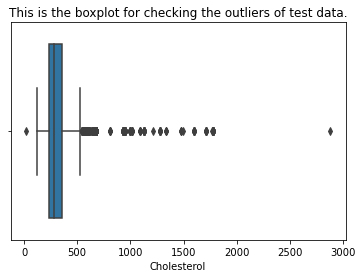

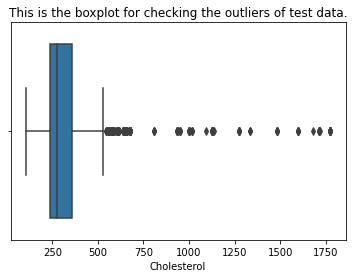

In [140]:
sns.boxplot( x= train_df["Cholesterol"])
plt.title("This is the boxplot for checking the outliers of test data.")
plt.show()

sns.boxplot( x= test_df["Cholesterol"])
plt.title("This is the boxplot for checking the outliers of test data.")
plt.show()

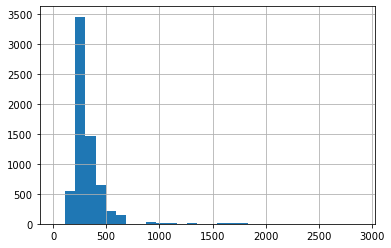

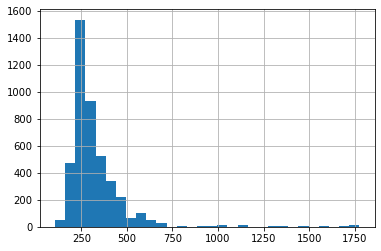

In [141]:
train_df["Cholesterol"].hist(bins=30)
plt.show()

test_df["Cholesterol"].hist(bins=30)
plt.show()

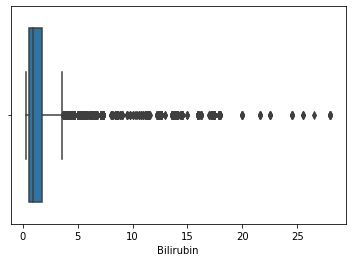

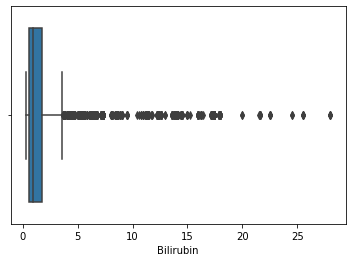

In [142]:
sns.boxplot(train_df["Bilirubin"])
plt.show()

sns.boxplot(test_df["Bilirubin"])
plt.show()

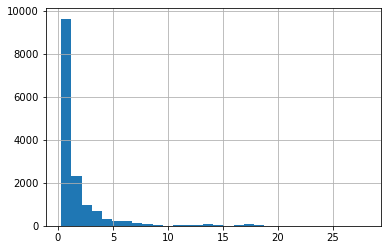

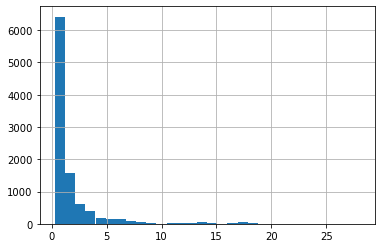

In [143]:
train_df["Bilirubin"].hist(bins=30)
plt.show()

test_df["Bilirubin"].hist(bins=30)
plt.show()

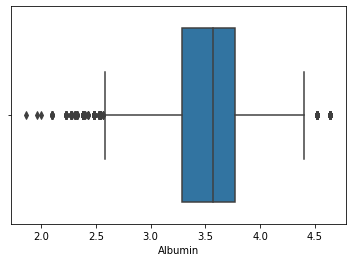

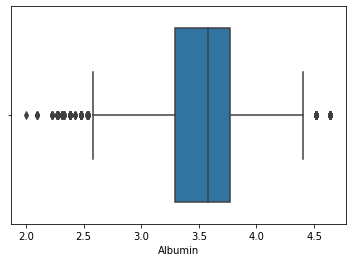

In [144]:
sns.boxplot(train_df["Albumin"])
plt.show()

sns.boxplot(test_df["Albumin"])
plt.show()

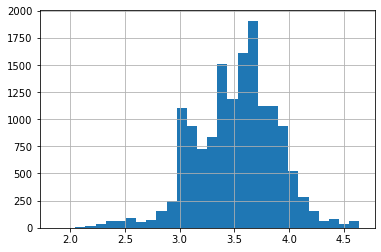

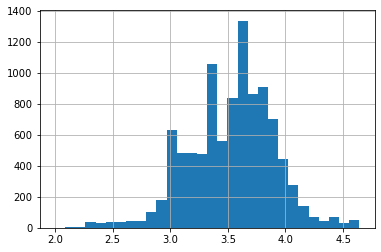

In [145]:
train_df["Albumin"].hist(bins=30)
plt.show()

test_df["Albumin"].hist(bins=30)
plt.show()

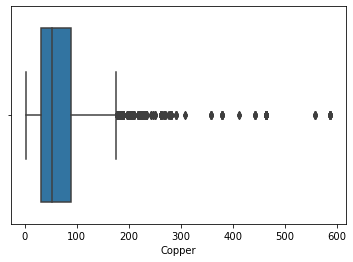

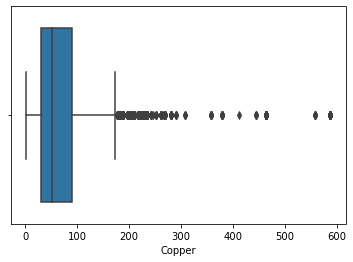

In [146]:
sns.boxplot(train_df["Copper"])
plt.show()

sns.boxplot(test_df["Copper"])
plt.show()

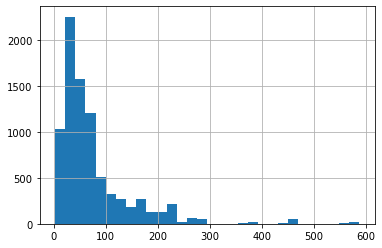

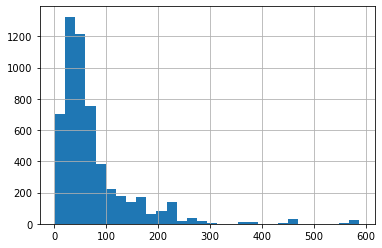

In [147]:
train_df["Copper"].hist(bins=30)
plt.show()

test_df["Copper"].hist(bins=30)
plt.show()

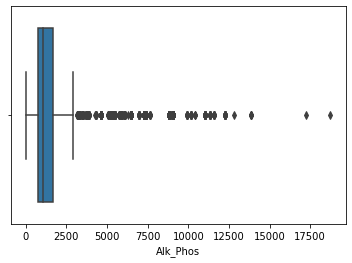

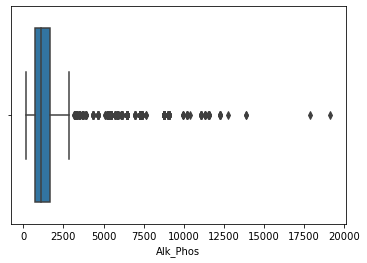

In [148]:
sns.boxplot(train_df["Alk_Phos"])
plt.show()

sns.boxplot(test_df["Alk_Phos"])
plt.show()

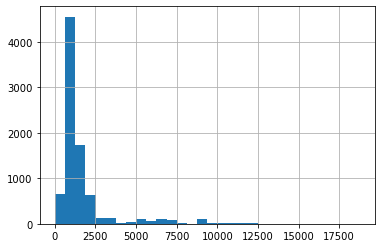

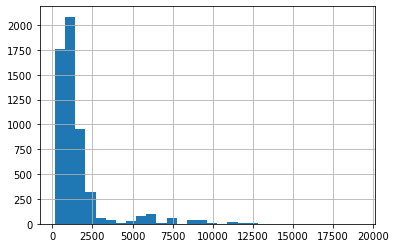

In [149]:
train_df["Alk_Phos"].hist(bins=30)
plt.show()

test_df["Alk_Phos"].hist(bins=30)
plt.show()

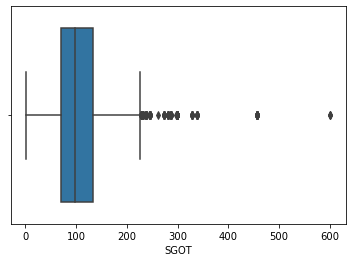

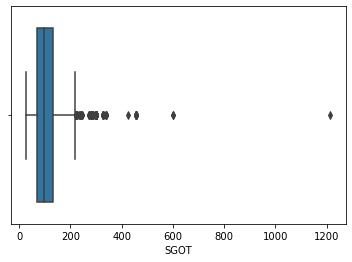

In [150]:
sns.boxplot(train_df["SGOT"])
plt.show()

sns.boxplot(test_df["SGOT"])
plt.show()

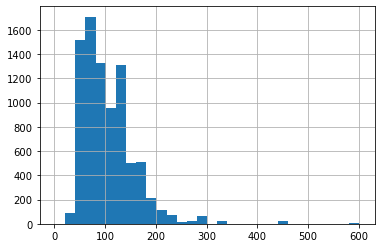

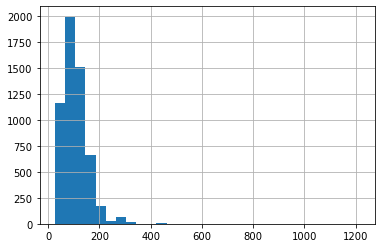

In [151]:
train_df["SGOT"].hist(bins=30)
plt.show()

test_df["SGOT"].hist(bins=30)
plt.show()

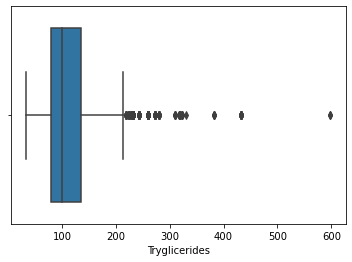

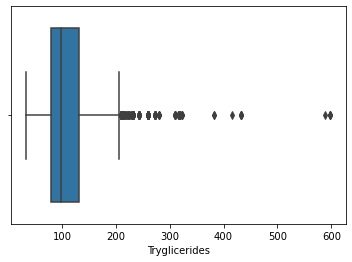

In [152]:
sns.boxplot(train_df["Tryglicerides"])
plt.show()

sns.boxplot(test_df["Tryglicerides"])
plt.show()

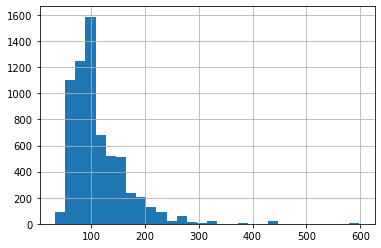

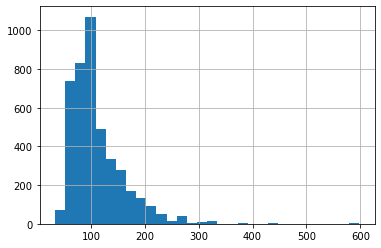

In [153]:
train_df["Tryglicerides"].hist(bins=30)
plt.show()

test_df["Tryglicerides"].hist(bins=30)
plt.show()

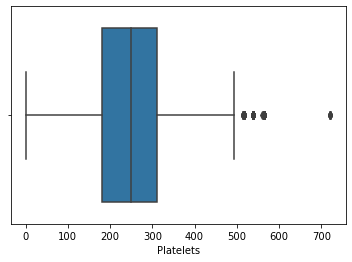

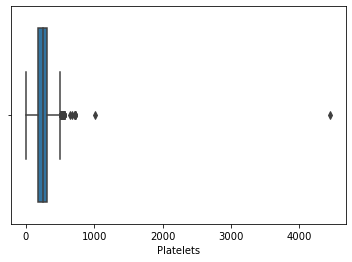

In [154]:
sns.boxplot(train_df["Platelets"])
plt.show()

sns.boxplot(test_df["Platelets"])
plt.show()

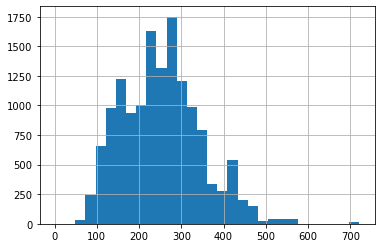

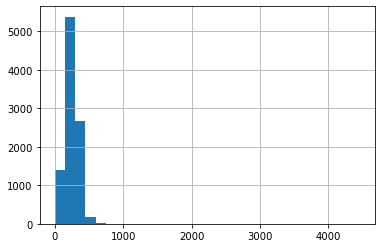

In [155]:
train_df["Platelets"].hist(bins=30)
plt.show()

test_df["Platelets"].hist(bins=30)
plt.show()

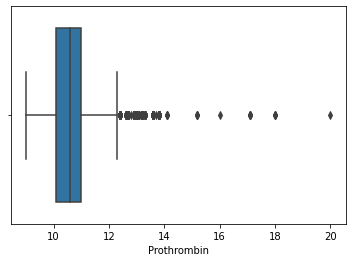

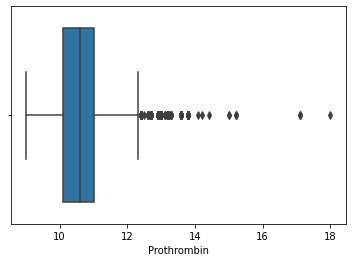

In [156]:
sns.boxplot(train_df["Prothrombin"])
plt.show()

sns.boxplot(test_df["Prothrombin"])
plt.show()

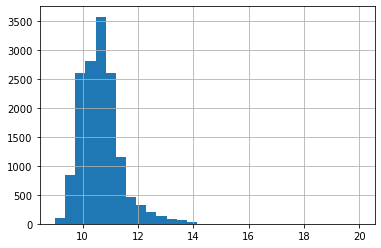

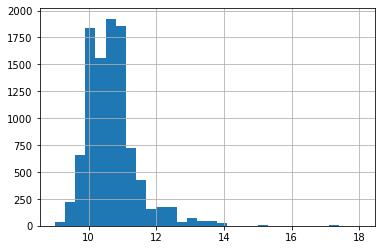

In [157]:
train_df["Prothrombin"].hist(bins=30)
plt.show()

test_df["Prothrombin"].hist(bins=30)
plt.show()

In [171]:
# Create a function to remove outliers
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers of numerical columns of train data
train_df = remove_outliers(train_df, "Cholesterol")
train_df = remove_outliers(train_df, "Bilirubin")
train_df = remove_outliers(train_df, "Albumin")
train_df = remove_outliers(train_df, "Copper")
train_df = remove_outliers(train_df, "Alk_Phos")
train_df = remove_outliers(train_df, "SGOT")
train_df = remove_outliers(train_df, "Tryglicerides")
train_df = remove_outliers(train_df, "Platelets")
train_df = remove_outliers(train_df, "Prothrombin")

# Remove outliers of numerical columns of test data
test_df = remove_outliers(test_df, "Cholesterol")
test_df = remove_outliers(test_df, "Bilirubin")
test_df = remove_outliers(test_df, "Albumin")
test_df = remove_outliers(test_df, "Copper")
test_df = remove_outliers(test_df, "Alk_Phos")
test_df = remove_outliers(test_df, "SGOT")
test_df = remove_outliers(test_df, "Tryglicerides")
test_df = remove_outliers(test_df, "Platelets")
test_df = remove_outliers(test_df, "Prothrombin")

In [172]:
print(train_df["Cholesterol"].describe())
print("___"*20)
print(test_df["Cholesterol"].describe())

count    2620.000000
mean      263.806107
std        48.136807
min       132.000000
25%       227.000000
50%       256.000000
75%       298.000000
max       396.000000
Name: Cholesterol, dtype: float64
____________________________________________________________
count    1761.000000
mean      263.974446
std        48.442819
min       132.000000
25%       231.000000
50%       256.000000
75%       298.000000
max       396.000000
Name: Cholesterol, dtype: float64


 After removing outliers the min value is 120, max value is 528 and the mean is 292 which makes sence.

##### Fill missing values of Clolesterol column with its mean.

In [173]:
# Fill missing values of Chelestrol column with the mean.
train_df["Cholesterol"].fillna(train_df["Cholesterol"].mean(), inplace=True)
test_df["Cholesterol"].fillna(test_df["Cholesterol"].mean(), inplace=True)

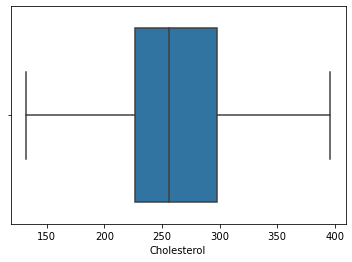

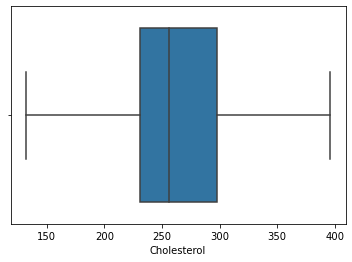

In [174]:
sns.boxplot(x = train_df["Cholesterol"])
plt.show()

sns.boxplot(x = test_df["Cholesterol"])
plt.show()

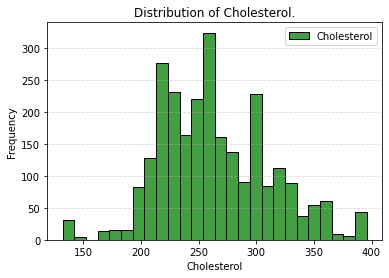

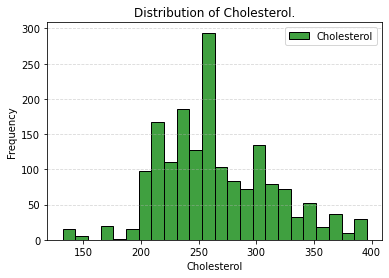

In [175]:
sns.histplot(train_df["Cholesterol"], color="green", label="Cholesterol")
plt.title('Distribution of Cholesterol.')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Cholesterol"], color="green", label="Cholesterol")
plt.title('Distribution of Cholesterol.')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [163]:
print(train_df["Bilirubin"].describe())
print("___"*20)
print(test_df["Bilirubin"].describe())

count    3865.000000
mean        1.040621
std         0.692264
min         0.300000
25%         0.600000
50%         0.800000
75%         1.100000
max         3.600000
Name: Bilirubin, dtype: float64
____________________________________________________________
count    2613.000000
mean        1.015614
std         0.664779
min         0.300000
25%         0.600000
50%         0.800000
75%         1.100000
max         3.600000
Name: Bilirubin, dtype: float64


##### Fill missing values of Bilirubin column with mean.

In [176]:
# Fill missing values of Bilirubin column with the mean.
train_df["Bilirubin"].fillna(train_df["Bilirubin"].mean(), inplace=True)
test_df["Bilirubin"].fillna(test_df["Bilirubin"].mean(), inplace=True)

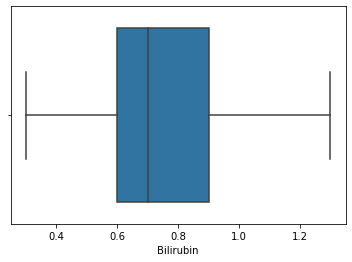

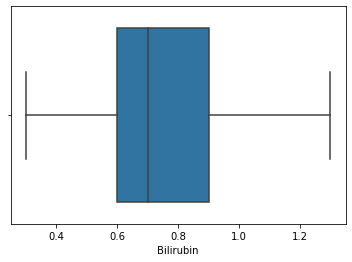

In [177]:
sns.boxplot(train_df["Bilirubin"])
plt.show()

sns.boxplot(test_df["Bilirubin"])
plt.show()

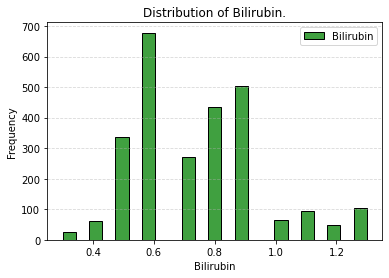

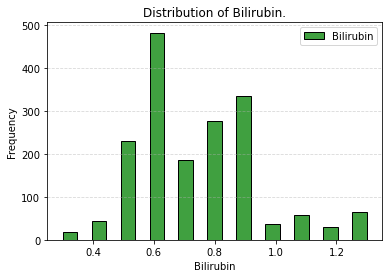

In [178]:
sns.histplot(train_df["Bilirubin"], color="green", label="Bilirubin")
plt.title('Distribution of Bilirubin.')
plt.xlabel('Bilirubin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Bilirubin"], color="green", label="Bilirubin")
plt.title('Distribution of Bilirubin.')
plt.xlabel('Bilirubin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [179]:
print(train_df["Albumin"].describe())
print("___"*20)
print(test_df["Albumin"].describe())

count    2620.000000
mean        3.677046
std         0.277313
min         2.980000
25%         3.500000
50%         3.690000
75%         3.850000
max         4.370000
Name: Albumin, dtype: float64
____________________________________________________________
count    1761.000000
mean        3.679625
std         0.275755
min         3.000000
25%         3.500000
50%         3.680000
75%         3.850000
max         4.300000
Name: Albumin, dtype: float64


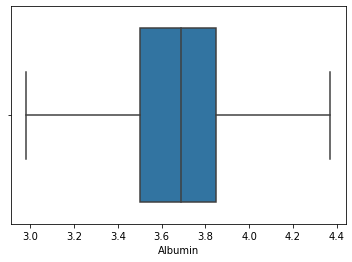

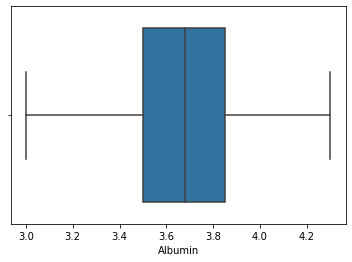

In [180]:
sns.boxplot(train_df["Albumin"])
plt.show()

sns.boxplot(test_df["Albumin"])
plt.show()

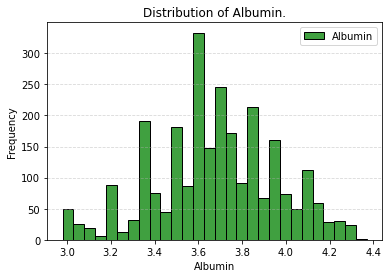

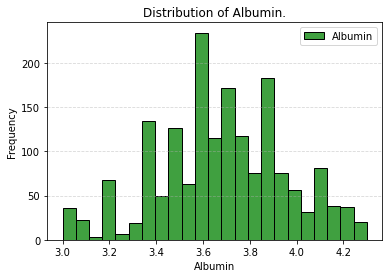

In [181]:
sns.histplot(train_df["Albumin"], color="green", label="Albumin")
plt.title('Distribution of Albumin.')
plt.xlabel('Albumin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Albumin"], color="green", label="Albumin")
plt.title('Distribution of Albumin.')
plt.xlabel('Albumin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [182]:
print(train_df["Copper"].describe())
print("___"*20)
print(test_df["Copper"].describe())

count    2620.000000
mean       40.807252
std        18.921409
min         4.000000
25%        25.000000
50%        39.000000
75%        52.000000
max        91.000000
Name: Copper, dtype: float64
____________________________________________________________
count    1761.000000
mean       40.688813
std        18.619691
min         4.000000
25%        25.000000
50%        39.000000
75%        52.000000
max        86.000000
Name: Copper, dtype: float64


##### Fill missing values of Copper column with its mean.

In [183]:
# Fill missing values of Copper column with the mean.
train_df["Copper"].fillna(train_df["Copper"].mean(), inplace=True)
test_df["Copper"].fillna(test_df["Copper"].mean(), inplace=True)

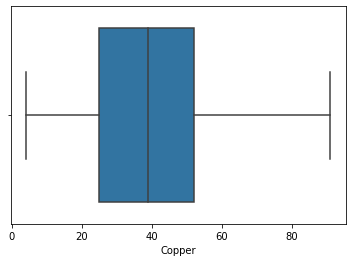

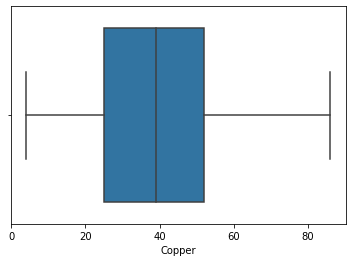

In [184]:
sns.boxplot(train_df["Copper"])
plt.show()

sns.boxplot(test_df["Copper"])
plt.show()

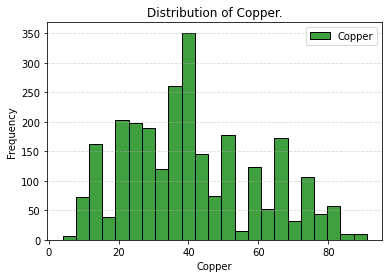

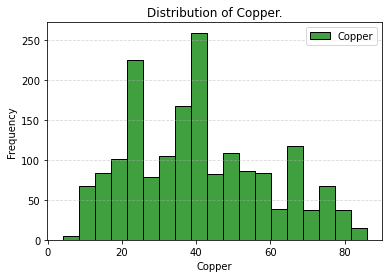

In [185]:
sns.histplot(train_df["Copper"], color="green", label="Copper")
plt.title('Distribution of Copper.')
plt.xlabel('Copper')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Copper"], color="green", label="Copper")
plt.title('Distribution of Copper.')
plt.xlabel('Copper')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [186]:
print(train_df["Alk_Phos"].describe())
print("___"*20)
print(test_df["Alk_Phos"].describe())

count    2620.000000
mean      944.167939
std       368.256066
min       289.000000
25%       663.000000
50%       843.000000
75%      1162.000000
max      1882.000000
Name: Alk_Phos, dtype: float64
____________________________________________________________
count    1761.000000
mean      941.625781
std       379.534706
min       159.000000
25%       661.000000
50%       842.000000
75%      1164.000000
max      1911.000000
Name: Alk_Phos, dtype: float64


##### Fill missing values of Alk_Phos column with its mean.

In [187]:
train_df["Alk_Phos"].fillna(train_df["Alk_Phos"].mean(), inplace=True)
test_df["Alk_Phos"].fillna(test_df["Alk_Phos"].mean(), inplace=True)

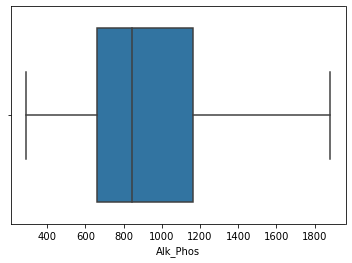

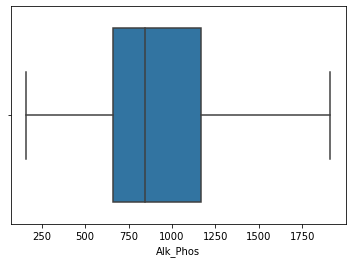

In [188]:
sns.boxplot(train_df["Alk_Phos"])
plt.show()

sns.boxplot(test_df["Alk_Phos"])
plt.show()

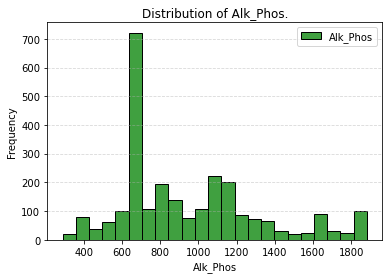

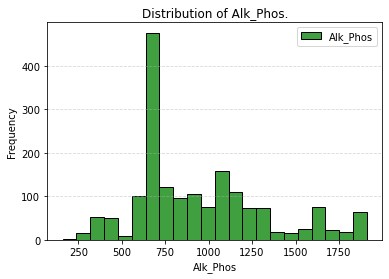

In [189]:
sns.histplot(train_df["Alk_Phos"], color="green", label="Alk_Phos")
plt.title('Distribution of Alk_Phos.')
plt.xlabel('Alk_Phos')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Alk_Phos"], color="green", label="Alk_Phos")
plt.title('Distribution of Alk_Phos.')
plt.xlabel('Alk_Phos')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [190]:
print(train_df["SGOT"].describe())
print("___"*20)
print(test_df["SGOT"].describe())

count    2620.000000
mean       88.206836
std        32.245216
min         0.900000
25%        62.000000
50%        75.950000
75%       108.500000
max       176.700000
Name: SGOT, dtype: float64
____________________________________________________________
count    1761.000000
mean       89.547127
std        32.353638
min        26.350000
25%        62.000000
50%        80.600000
75%       110.050000
max       179.800000
Name: SGOT, dtype: float64


##### Fill missing values of SGOT column with its mean.

In [191]:
train_df["SGOT"].fillna(train_df["SGOT"].mean(), inplace=True)
test_df["SGOT"].fillna(test_df["SGOT"].mean(), inplace=True)

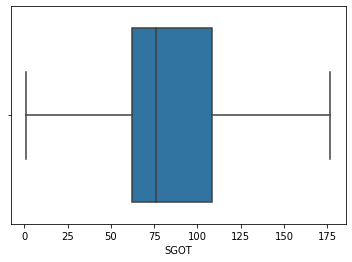

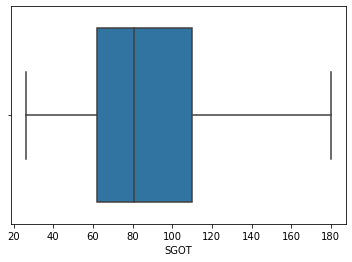

In [192]:
sns.boxplot(train_df["SGOT"])
plt.show()

sns.boxplot(test_df["SGOT"])
plt.show()

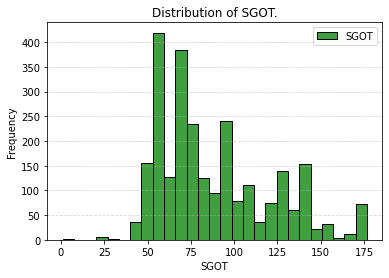

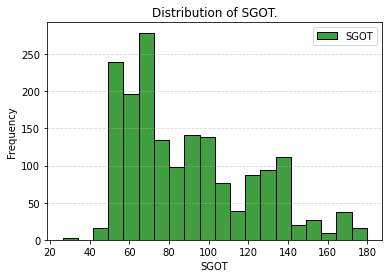

In [193]:
sns.histplot(train_df["SGOT"], color="green", label="SGOT")
plt.title('Distribution of SGOT.')
plt.xlabel('SGOT')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["SGOT"], color="green", label="SGOT")
plt.title('Distribution of SGOT.')
plt.xlabel('SGOT')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [194]:
print(train_df["Tryglicerides"].describe())
print("___"*20)
print(test_df["Tryglicerides"].describe())

count    2620.000000
mean       91.930534
std        26.053689
min        33.000000
25%        70.000000
50%        88.000000
75%       106.000000
max       158.000000
Name: Tryglicerides, dtype: float64
____________________________________________________________
count    1761.000000
mean       90.915389
std        26.352488
min        33.000000
25%        69.000000
50%        86.000000
75%       106.000000
max       158.000000
Name: Tryglicerides, dtype: float64


##### Fill missing values of Tryglicerides column with its mean.

In [195]:
train_df["Tryglicerides"].fillna(train_df["Tryglicerides"].mean(), inplace=True)
test_df["Tryglicerides"].fillna(test_df["Tryglicerides"].mean(), inplace=True)

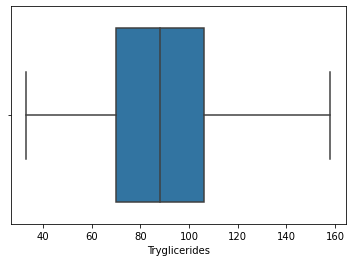

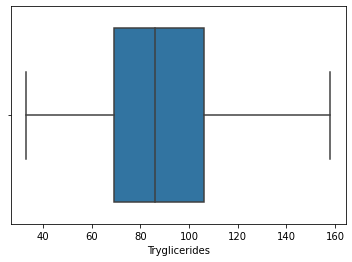

In [82]:
sns.boxplot(train_df["Tryglicerides"])
plt.show()

sns.boxplot(test_df["Tryglicerides"])
plt.show()

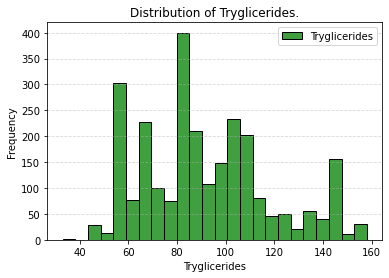

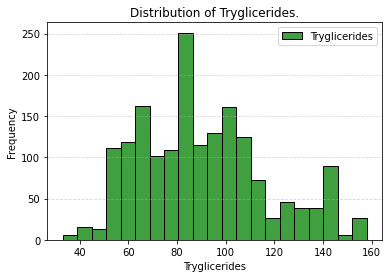

In [196]:
sns.histplot(train_df["Tryglicerides"], color="green", label="Tryglicerides")
plt.title('Distribution of Tryglicerides.')
plt.xlabel('Tryglicerides')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Tryglicerides"], color="green", label="Tryglicerides")
plt.title('Distribution of Tryglicerides.')
plt.xlabel('Tryglicerides')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [197]:
print(train_df["Platelets"].describe())
print("___"*20)
print(test_df["Platelets"].describe())

count    2620.000000
mean      279.194656
std        81.195099
min        71.000000
25%       224.000000
50%       273.000000
75%       336.000000
max       493.000000
Name: Platelets, dtype: float64
____________________________________________________________
count    1761.000000
mean      272.550823
std        79.609008
min        70.000000
25%       221.000000
50%       270.000000
75%       324.000000
max       467.000000
Name: Platelets, dtype: float64


##### Fill missing values of Platelets with its mean.

In [198]:
train_df["Platelets"].fillna(train_df["Platelets"].mean(), inplace=True)
test_df["Platelets"].fillna(test_df["Platelets"].mean(), inplace=True)

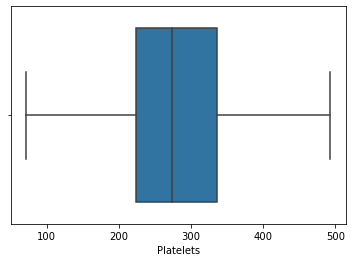

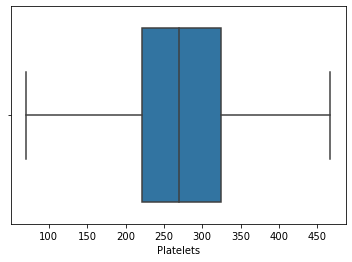

In [199]:
sns.boxplot(train_df["Platelets"])
plt.show()

sns.boxplot(test_df["Platelets"])
plt.show()

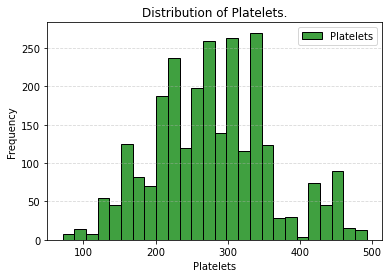

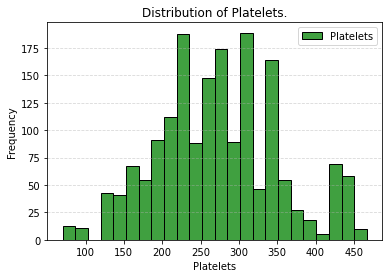

In [200]:
sns.histplot(train_df["Platelets"], color="green", label="Platelets")
plt.title('Distribution of Platelets.')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Platelets"], color="green", label="Platelets")
plt.title('Distribution of Platelets.')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [201]:
print(train_df["Prothrombin"].describe())
print("___"*20)
print(test_df["Prothrombin"].describe())

count    2620.000000
mean       10.376031
std         0.519514
min         9.000000
25%         9.900000
50%        10.400000
75%        10.700000
max        11.800000
Name: Prothrombin, dtype: float64
____________________________________________________________
count    1761.000000
mean       10.365815
std         0.530374
min         9.000000
25%         9.900000
50%        10.400000
75%        10.700000
max        11.800000
Name: Prothrombin, dtype: float64


##### Fill missing values of Prothrombin column with its mean.

In [202]:
train_df["Prothrombin"].fillna(train_df["Prothrombin"].mean(), inplace=True)
test_df["Prothrombin"].fillna(test_df["Prothrombin"].mean(), inplace=True)

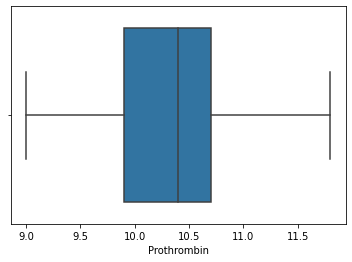

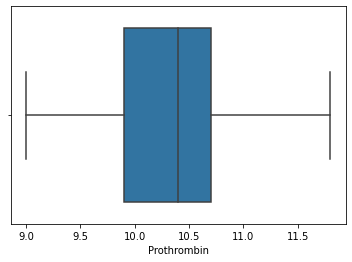

In [203]:
sns.boxplot(train_df["Prothrombin"])
plt.show()

sns.boxplot(test_df["Prothrombin"])
plt.show()

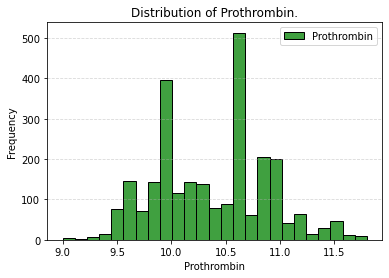

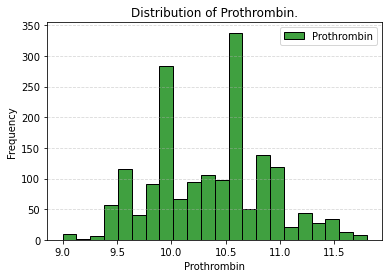

In [204]:
sns.histplot(train_df["Prothrombin"], color="green", label="Prothrombin")
plt.title('Distribution of Prothrombin.')
plt.xlabel('Prothrombin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

sns.histplot(test_df["Prothrombin"], color="green", label="Prothrombin")
plt.title('Distribution of Prothrombin.')
plt.xlabel('Prothrombin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [205]:
# Check if there is any remaining missing values.
print(train_df.isnull().sum())
print("___"*20)
print(test_df.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
Age_in_Years     0
dtype: int64
____________________________________________________________
id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Age_in_Years     0
dtype: int64


Now there is no missing values

In [206]:
# Label encoder (encode the status column)
le = LabelEncoder()
train_df['Status'] = le.fit_transform(train_df['Status'])

In [95]:
print(train_df.head())

    id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
2    2  1725.0          Placebo  12897.0   F       N            N       N   
6    6  4365.0  D-penicillamine  20567.0   F       N            N       N   
19  19  2556.0          Placebo  18352.0   F       N            N       N   
35  35  3820.0          Placebo  17703.0   F       N            N       N   
49  49  2216.0  D-penicillamine  20810.0   F       N            Y       Y   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
2      N        0.8        232.0     3.85     9.0    1074.0  128.65   
6      N        0.9        226.0     3.61    82.0     646.0   57.00   
19     N        0.6        256.0     3.50    31.0    1072.0   56.76   
35     N        0.7        248.0     3.60    41.0     661.0   93.00   
49     N        0.6        252.0     3.46    64.0     681.0   72.85   

    Tryglicerides  Platelets  Prothrombin  Stage  Status  
2            99.0      295.0          9.5    3.0   

##### Exploring Visualization

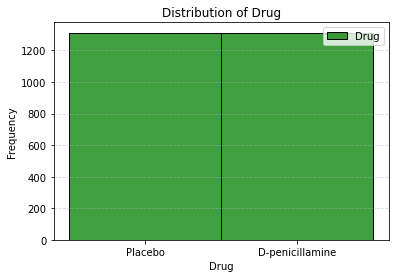

In [228]:
sns.histplot(train_df["Drug"], color="green", label="Drug")
plt.title('Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

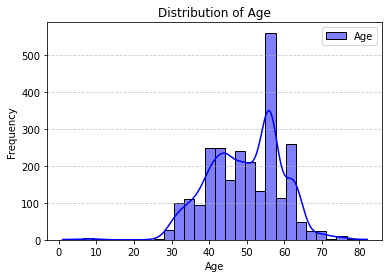

In [229]:
sns.histplot(train_df["Age"], bins=30, kde=True, color="blue", label="Age")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

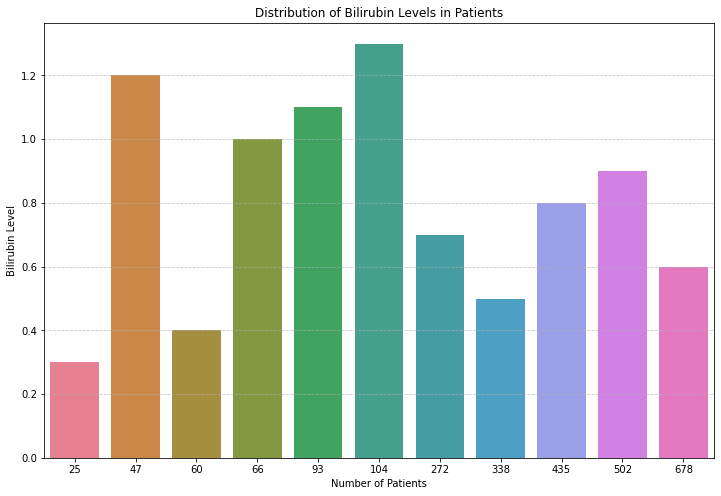

In [220]:
industry_counts = train_df["Bilirubin"].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='husl')
plt.title('Distribution of Bilirubin Levels in Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Bilirubin Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

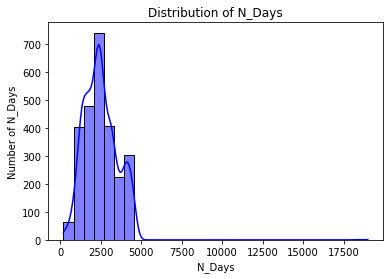

In [223]:
sns.histplot(train_df['N_Days'], bins = 30, kde = True, color = 'blue')
plt.title('Distribution of N_Days')
plt.xlabel('N_Days')
plt.ylabel('Number of N_Days')
plt.show()

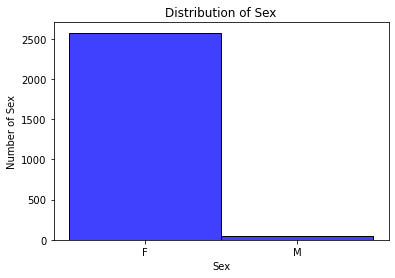

In [225]:
sns.histplot(train_df['Sex'], bins = 30, color = 'blue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Sex')
plt.show()

According to the distrbution most of the patient are Female

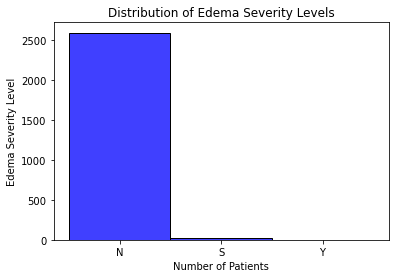

In [227]:

sns.histplot(train_df['Edema'], bins = 30, color = 'blue')
plt.title('Distribution of Edema Severity Levels')
plt.xlabel('Number of Patients')
plt.ylabel('Edema Severity Level')
plt.show()